In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
start_date='2010-01-01'
end_date='2019-12-31'
symbol='AAPL'
dataset=yf.download(symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [12]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170471,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236221,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609909,93121200


In [26]:
#we dont want date to be the index so making it normal column using reset index
df=dataset.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170471,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236221,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609909,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583122,146266000


In [27]:
df=df.drop(['Date','Adj Close'],axis=1)
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [28]:
df=df.iloc[:,3:4]
df

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


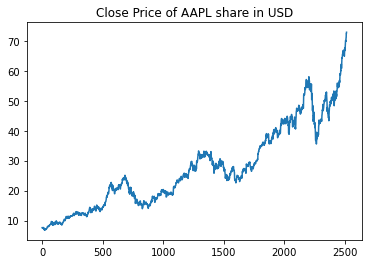

In [29]:
plt.plot(df.Close)
plt.title('Close Price of AAPL share in USD')
plt.show()

In [31]:
ma100=df.Close.rolling(100).mean()

In [32]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

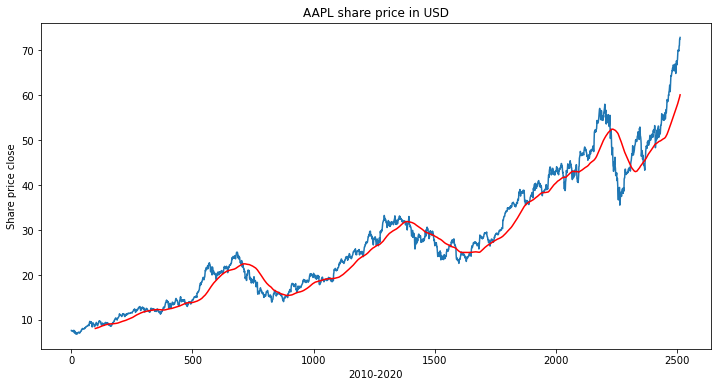

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.xlabel('2010-2020')
plt.ylabel('Share price close')
plt.title('AAPL share price in USD')
plt.show()

In [13]:
ma200=df.Close.rolling(200).mean()

In [14]:
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

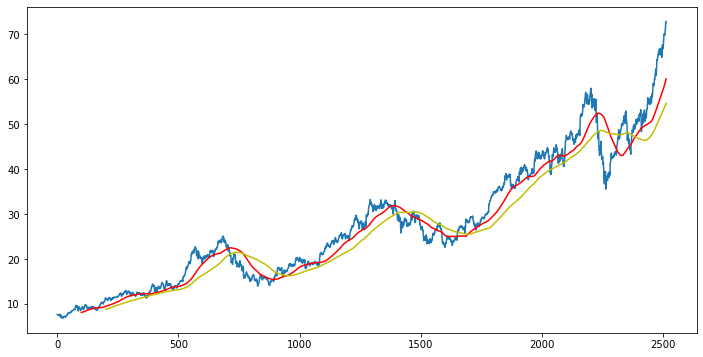

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'y')

In [16]:
df.shape

(2515, 1)

In [56]:
#splitting data into training and testing 
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [57]:
data_training

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [58]:
data_testing


,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [59]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array=Scaler.fit_transform(data_training)
data_tesing_array=Scaler.fit_transform(data_testing)

In [63]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [65]:
data_tesing_array

array([[0.0051793 ],
       [0.        ],
       [0.00187821],
       [0.00113829],
       [0.00449631],
       [0.0118953 ],
       [0.01804211],
       [0.01872511],
       [0.02236768],
       [0.01952192],
       [0.0183267 ],
       [0.02379056],
       [0.02373363],
       [0.02253841],
       [0.02379056],
       [0.02424589],
       [0.02361982],
       [0.0344906 ],
       [0.03483212],
       [0.034889  ],
       [0.03306772],
       [0.0314741 ],
       [0.07359136],
       [0.07233921],
       [0.07546957],
       [0.08235626],
       [0.08941377],
       [0.09231642],
       [0.09447922],
       [0.09277175],
       [0.09943082],
       [0.10927721],
       [0.112066  ],
       [0.11115542],
       [0.11326126],
       [0.11883892],
       [0.12117247],
       [0.11787137],
       [0.1186113 ],
       [0.12014795],
       [0.12048951],
       [0.1364257 ],
       [0.13170181],
       [0.13636881],
       [0.13386453],
       [0.13488905],
       [0.13192943],
       [0.130

In [66]:
data_training_array.shape

(1760, 1)

In [67]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [68]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [69]:
x_train.shape

(1660, 100, 1)

In [1]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [70]:
import tensorflow as tf

In [71]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [133]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu',))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [134]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [135]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 25s 297ms/step - loss: 0.0782
Epoch 2/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0142
Epoch 3/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0104
Epoch 4/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0103
Epoch 5/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0092
Epoch 6/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0106
Epoch 7/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0096
Epoch 8/50
52/52 [==============================] - 15s 295ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0078
Epoch 10/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0080
Epoch 12/50
52/52 [==============================] - 14s 276ms/step - loss: 0.0086
Epoch 13/50
5

In [136]:
model.save('keas_model_LSTM')

INFO:tensorflow:Assets written to: keas_model_LSTM\assets


INFO:tensorflow:Assets written to: keas_model_LSTM\assets


In [140]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [141]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [142]:
past_100_days=data_training.tail(100)

In [143]:
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [144]:
input_data=Scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [145]:
input_data.shape

(855, 1)

In [146]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [147]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [148]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [149]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 4s 113ms/step


In [150]:
y_predicted.shape

(755, 1)

In [151]:
y_test.shape

(755,)

In [152]:
Scaler.scale_

array([0.02123255])

In [153]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

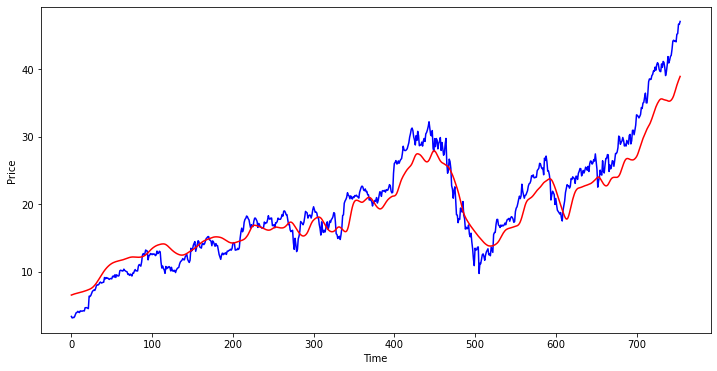

In [154]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()